# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

from MCForecastTools import MCSimulation
import json
%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv('../../.env')

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price

my_btc_value=0
response_data = requests.get(btc_url)
btc_api_content = json.loads(json.dumps(response_data.json(), indent=4))
btc_price= btc_api_content['data']['1']['quotes']['USD']['price']
# Fetch current ETH price
response_data = requests.get(eth_url)
eth_api_content = json.loads(json.dumps(response_data.json(), indent=4))
eth_price= eth_api_content['data']['1027']['quotes']['USD']['price']
# Compute current value of my crpto
my_btc_value=my_btc*btc_price
my_eth_value=my_eth*eth_price
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $63920.40
The current value of your 5.3 ETH is $13524.43


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_spy=50
my_agg=200

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2020-10-21", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio.head()

AGG                                       SPY  \
                             open    high     low    close   volume    open   
time                                                                          
2020-10-21 00:00:00-04:00  117.59  117.64  117.48  117.515  2910530  343.33   

                                                            
                             high    low   close    volume  
time                                                        
2020-10-21 00:00:00-04:00  345.67  342.4  342.69  46745662

In [9]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio["AGG"]["close"].item()
spy_close_price = df_portfolio["SPY"]["close"].item()

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.515
Current SPY closing price: $342.69


In [10]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17134.50
The current value of your 200 AGG shares is $23503.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
total_portfolio_dictionary = {'Amount': [my_btc_value+my_eth_value, my_spy_value+my_agg_value]}
df_savings = pd.DataFrame(total_portfolio_dictionary,index=['Crypto','Shares'])

# Display savings DataFrame
display(df_savings)

,Amount
Crypto,77444.834
Shares,40637.500


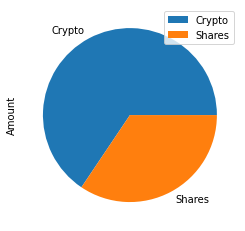

In [12]:
# Plot savings pie chart
df_savings.plot(kind='pie', subplots=True);

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings.sum().item()

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations on having more than 3x your monthly income in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations on reaching your goal of 3x your monthly income in your emergency fund.")
else:
    print(f'You are ${emergency_fund - total_savings} away from reaching your goal of 3x your monthly income in your emergency fund.')

Congratulations on having more than 3x your monthly income in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low   close    volume   
time                                                                      
2020-03-18 00:00:00-04:00  109.36  110.5700  105.7707  106.33  30173684   
2020-03-19 00:00:00-04:00  106.47  109.2200  105.5600  108.97  21031320   
2020-03-20 00:00:00-04:00  108.46  110.2399  108.4600  109.49  28449412   
2020-03-23 00:00:00-04:00  109.90  112.9400  109.0000  112.55  23873510   
2020-03-24 00:00:00-04:00  111.52  113.5000  111.0754  113.29  18141498   

                              SPY                                       
                             open      high     low   close     volume  
time                                                                    
2020-03-18 00:00:00-04:00  236.25  248.3700  228.02  241.01  256921808  
2020-03-19 00:00:00-04:00  239.25  247.3800  232.22  241.18  248430643  
2020-03-20 00:00:00-04:00  242.53  244.4700  228.50  228.94  286308782  
2020-03-23 00:00:00-04:00  228.19  229.6833  218.26  222.51  268298876  
2020-03-24 00:00:00-04:00  234.42  244.1000  233.80  243.59  203576470

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
MC_30_year.portfolio_data.head()

AGG                                        \
                             open      high       low   close    volume   
time                                                                      
2020-03-18 00:00:00-04:00  109.36  110.5700  105.7707  106.33  30173684   
2020-03-19 00:00:00-04:00  106.47  109.2200  105.5600  108.97  21031320   
2020-03-20 00:00:00-04:00  108.46  110.2399  108.4600  109.49  28449412   
2020-03-23 00:00:00-04:00  109.90  112.9400  109.0000  112.55  23873510   
2020-03-24 00:00:00-04:00  111.52  113.5000  111.0754  113.29  18141498   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2020-03-18 00:00:00-04:00          NaN  236.25  248.3700  228.02  241.01   
2020-03-19 00:00:00-04:00     0.024828  239.25  247.3800  232.22  241.18   
2020-03-20 00:00:00-04:00     0.004772  242.53  244.4700  228.50  228.94   
2020-03-23 00:00:00-04:00     0.027948  228.19  229.6833  218.26  222.51   
2020-03-24 00:00:00-04:00     0.006575  234.42  244.1000  233.80  243.59   

                                                   
                              volume daily_return  
time                                               
2020-03-18 00:00:00-04:00  256921808          NaN  
2020-03-19 00:00:00-04:00  248430643     0.000705  
2020-03-20 00:00:00-04:00  286308782    -0.050750  
2020-03-23 00:00:00-04:00  268298876    -0.028086  
2020-03-24 00:00:00-04:00  203576470     0.094737

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1,1.026660e+00,9.957275e-01,9.883107e-01,1.003435e+00,9.855525e-01,9.872987e-01,1.026261e+00,9.856733e-01,9.859818e-01,9.906596e-01,...,9.896786e-01,1.019478e+00,1.002997e+00,1.004139e+00,9.843485e-01,1.013139e+00,9.987105e-01,1.007223e+00,1.002074e+00,1.008353e+00
2,1.014338e+00,9.882326e-01,9.877713e-01,9.886173e-01,9.851019e-01,9.899866e-01,1.027394e+00,9.924349e-01,9.918177e-01,9.821987e-01,...,9.864533e-01,1.035002e+00,9.817025e-01,1.015413e+00,9.994986e-01,1.022116e+00,1.031433e+00,1.001369e+00,1.000070e+00,1.005032e+00
3,1.020472e+00,1.009177e+00,9.543211e-01,9.841644e-01,9.936457e-01,9.945813e-01,1.014355e+00,9.778665e-01,1.000262e+00,9.937597e-01,...,9.644319e-01,1.032591e+00,9.578072e-01,1.026964e+00,9.859656e-01,1.025230e+00,1.030518e+00,9.817512e-01,1.015995e+00,1.013917e+00
4,1.007072e+00,1.001861e+00,9.291577e-01,9.758220e-01,9.895868e-01,1.000128e+00,1.016001e+00,9.870246e-01,1.003273e+00,1.015292e+00,...,9.299887e-01,1.025083e+00,9.489843e-01,1.035734e+00,9.880026e-01,1.045486e+00,1.034789e+00,9.827283e-01,1.013604e+00,1.009524e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.679403e+07,7.206862e+08,3.503643e+08,2.158868e+08,7.952945e+07,4.933779e+07,3.402500e+08,1.656661e+08,3.207565e+08,1.187228e+08,...,9.272403e+08,2.887972e+08,1.024592e+08,2.045563e+08,5.475597e+08,1.538999e+08,8.712308e+07,1.091970e+08,2.354535e+07,7.268396e+08
7557,8.836850e+07,7.277064e+08,3.446222e+08,2.140525e+08,8.025776e+07,5.021486e+07,3.405735e+08,1.603120e+08,3.247130e+08,1.178274e+08,...,9.213694e+08,2.878249e+08,1.021307e+08,2.061578e+08,5.543423e+08,1.519378e+08,8.982050e+07,1.132237e+08,2.372784e+07,7.368329e+08
7558,8.779591e+07,7.107689e+08,3.493845e+08,2.182309e+08,8.012233e+07,4.978879e+07,3.389991e+08,1.633914e+08,3.286512e+08,1.195214e+08,...,9.119393e+08,2.847550e+08,1.041733e+08,2.022606e+08,5.585479e+08,1.536287e+08,8.885381e+07,1.143878e+08,2.389722e+07,7.448166e+08
7559,8.818373e+07,7.201610e+08,3.557585e+08,2.183083e+08,7.960460e+07,4.978826e+07,3.262838e+08,1.637609e+08,3.269681e+08,1.189723e+08,...,9.190867e+08,2.934461e+08,1.026971e+08,2.007122e+08,5.658871e+08,1.537885e+08,9.088852e+07,1.141564e+08,2.360488e+07,7.521030e+08


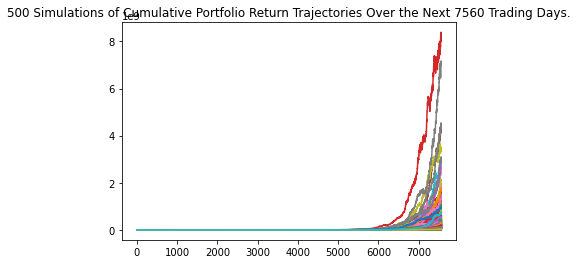

In [19]:
# Plot simulation outcomes
line_plot = MC_30_year.plot_simulation()

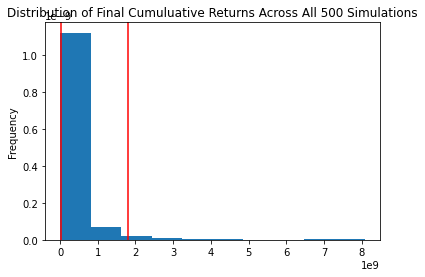

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30_year.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_30_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           5.000000e+02
mean            3.717616e+08
std             6.863709e+08
min             8.269633e+06
25%             8.192232e+07
50%             1.882649e+08
75%             3.738109e+08
max             8.073357e+09
95% CI Lower    2.262583e+07
95% CI Upper    1.807591e+09
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $452516689735.76 and $36151823408333.56


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $678775034603.63 and $54227735112500.33


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009955,1.000250,0.990291,1.023240,0.994652,1.016892,0.970851,1.000624,1.010139,1.001760,...,1.000473,0.997842,0.987878,1.002880,1.005459,1.013533,1.009247,1.001452,0.998630,1.020229
2,1.029511,0.991557,0.996452,1.018510,0.982223,1.018143,0.981495,1.024435,1.014160,1.028195,...,0.995528,1.000532,0.995929,1.018064,1.020351,1.014060,0.992463,1.001323,0.992802,1.017815
3,1.044177,0.984402,1.002793,1.002569,0.996232,1.029985,0.985098,1.037315,1.012371,1.002362,...,1.011212,0.997896,0.996945,1.022930,1.031931,1.013774,1.001766,0.993085,0.978084,1.011337
4,1.050614,0.976614,1.006790,1.030065,0.997432,1.040905,0.989569,1.058033,1.025174,1.024473,...,1.013896,0.985109,0.983039,1.018861,1.014624,1.021762,1.007433,0.998504,0.975299,0.974301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,26.019777,15.391822,11.870367,37.646832,16.247034,22.338231,32.826774,19.764221,19.226206,16.172609,...,37.732713,24.341726,76.780903,37.337218,13.482389,24.418525,13.043137,10.308216,19.875627,26.683696
1257,26.412045,15.654426,11.652271,37.386325,16.391363,22.235479,33.219327,19.245933,19.292429,16.344493,...,38.851552,24.803294,76.208179,37.267057,13.370958,24.731821,13.573959,10.309580,20.056803,26.688159
1258,26.608662,15.587779,11.675780,37.757420,16.439236,22.117147,32.819721,19.528055,18.976190,16.546617,...,38.589666,25.161877,76.916199,36.612273,13.443513,24.738205,13.116826,10.674766,19.987958,26.312302
1259,26.350667,15.513109,11.572107,38.913886,16.386287,22.142745,33.413796,19.502960,19.343159,16.409756,...,38.750394,25.217225,75.171308,37.446610,13.385738,24.234038,12.990335,10.848689,19.943033,26.487031


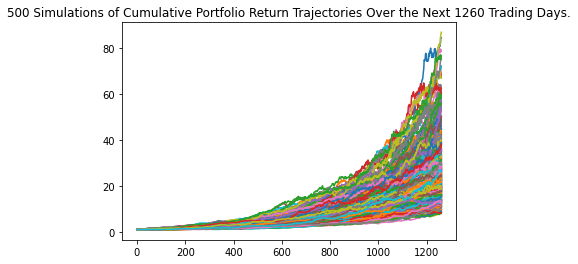

In [26]:
# Plot simulation outcomes
line_plot = MC_5_year.plot_simulation()


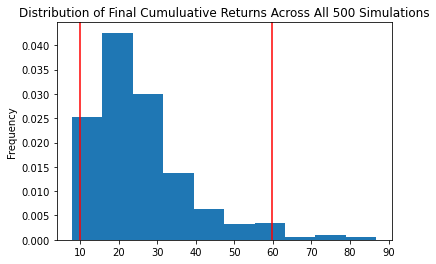

In [27]:
# Plot probability distribution and confidence intervals
dist_plot = MC_5_year.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_5_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             25.727348
std              12.789906
min               7.896303
25%              17.049888
50%              22.830346
75%              30.314580
max              86.816135
95% CI Lower      9.947538
95% CI Upper     59.815224
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment = 40000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_five = round(tbl[8]*initial_investment,2)
ci_upper_five = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000.0 in the portfolio over the next 5 years will end within in the range of $596852.29 and $3588913.45


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_year.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.015026,0.995084,1.018588,0.984472,1.021374,1.005134,1.003543,1.015353,1.018724,0.970612,...,0.993852,0.991071,0.995542,1.010184,0.993546,0.982618,1.013054,0.991148,0.989719,0.993321
2,1.011591,0.992927,1.004728,0.981629,1.013908,1.020614,0.972488,1.017117,1.010385,0.961189,...,0.983138,1.007821,1.009186,0.989815,0.986092,0.976457,1.037542,1.004360,0.996238,1.020728
3,1.013426,0.987078,1.001970,0.991402,1.007981,1.024987,0.963961,1.043058,1.005713,0.965899,...,0.987162,0.999001,1.002751,0.986523,0.959351,0.989132,1.063706,0.998624,0.986836,1.026898
4,1.022130,0.977104,1.001165,0.997048,1.005029,1.022587,0.959659,1.029036,0.983642,0.971895,...,0.997551,0.988027,1.009538,1.008355,0.966917,0.995179,1.065005,1.012984,1.000915,1.010713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,700.470975,267.834097,1047.717394,703.648340,396.378772,1035.521488,308.128634,624.673251,1383.913423,119.773979,...,436.318172,159.294517,792.495526,503.408590,716.889528,1340.464932,916.934697,343.217001,274.021002,1119.613843
2517,704.498821,266.698364,1054.363885,699.352165,397.838102,1047.612459,313.523809,626.238804,1397.356715,118.302401,...,435.874849,159.028042,799.074570,502.633483,713.624708,1371.861813,917.210907,353.762966,274.158438,1101.133049
2518,701.799465,263.035597,1050.013429,722.171960,397.054162,1087.790187,316.745669,632.113175,1410.977738,119.333145,...,444.822093,163.433750,815.103939,504.752240,709.010950,1393.909026,934.332633,364.413037,278.903576,1128.481747
2519,712.951908,257.401399,1062.668275,745.290912,408.564349,1094.478949,319.013647,627.232268,1408.200691,122.572447,...,452.977289,161.509122,828.155100,511.548828,725.617947,1420.035433,930.717086,370.554109,285.674058,1132.856583


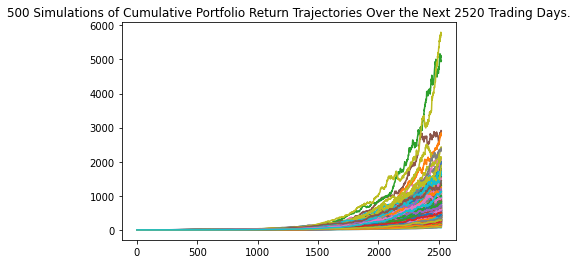

In [32]:
# Plot simulation outcomes
line_plot = MC_10_year.plot_simulation()

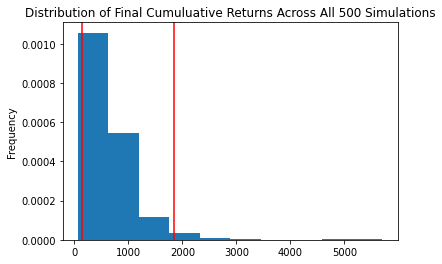

In [33]:
# Plot probability distribution and confidence intervals
dist_plot = MC_10_year.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_10_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count            500.000000
mean             664.286574
std              519.558470
min               67.967862
25%              352.195304
50%              542.500234
75%              825.870231
max             5705.863243
95% CI Lower     147.378931
95% CI Upper    1845.903216
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment = 90000 * 1.5


# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_ten = round(tbl[8]*initial_investment,2)
ci_upper_ten = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $135000.0 in the portfolio over the next 10 years will end within in the range of $19896155.68 and $249196934.16
